In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Problem 1
## Dataset Generation

Write a function to **generate a training set** of size $m$
- randomly generate a weight vector $w \in \mathbb{R}^{10}$, normalize length
- generate a training set $\{(x_i , y_i)\}$ of size m
  - $x_i$: random vector in $\mathbb{R}^{10}$ from $\textbf{N}(0, I)$
  - $y_i$: $\{0, +1\}$ with $P[y = +1] = \sigma(w \cdot x_i)$ and $P[y = 0] = 1 - \sigma(w \cdot x_i)$

In [13]:
def generate_data(m):
    # Generate w* (weight vector)
    w_star = np.random.normal(0, 1, 10)
    w_star = w_star / np.linalg.norm(w_star)  # Normalize to unit length
    
    # Generate x vectors
    X = np.random.normal(0, 1, (m, 10))
    
    # Generate y labels
    def sigmoid(z):
        return 1 / (1 + np.exp(-z))
    
    y = np.zeros(m)
    for i in range(m):
        prob = sigmoid(np.dot(w_star, X[i]))
        y[i] = 1 if np.random.uniform(0, 1) <= prob else 0
    
    return X, y, w_star



In [23]:
def generate_multiple_datasets(sample_sizes, num_repetitions):
    datasets = {}
    for m in sample_sizes:
        datasets[m] = [generate_data(m) for _ in range(num_repetitions)]
    return datasets

# Define sample sizes and number of repetitions
sample_sizes = [50, 100, 150, 200, 250]
num_repetitions = 10

# Generate datasets
datasets = generate_multiple_datasets(sample_sizes, num_repetitions)

print(f"Generated {num_repetitions} datasets for each sample size: {sample_sizes}")

#Describe the shape of the datasets dictionary
print(f"Shape of the datasets dictionary: {len(datasets)}")
print(f"Shape of the datasets dictionary: {len(datasets[50])}")
print(f"Shape of the datasets dictionary: {len(datasets[50][0])}")
print(f"Shape of the datasets dictionary: {len(datasets[50][0][0])}")
print(f"Shape of the datasets dictionary: {len(datasets[50][0][0][0])}")


Generated 10 datasets for each sample size: [50, 100, 150, 200, 250]
Shape of the datasets dictionary: 5
Shape of the datasets dictionary: 10
Shape of the datasets dictionary: 3
Shape of the datasets dictionary: 50
Shape of the datasets dictionary: 10


## Algorithm 1: logistic regression

The goal is to learn $w$.  Algorithm 1 is logistic
  regression (you may use the built-in method LogisticRegression for this. Use max_iter=1000).

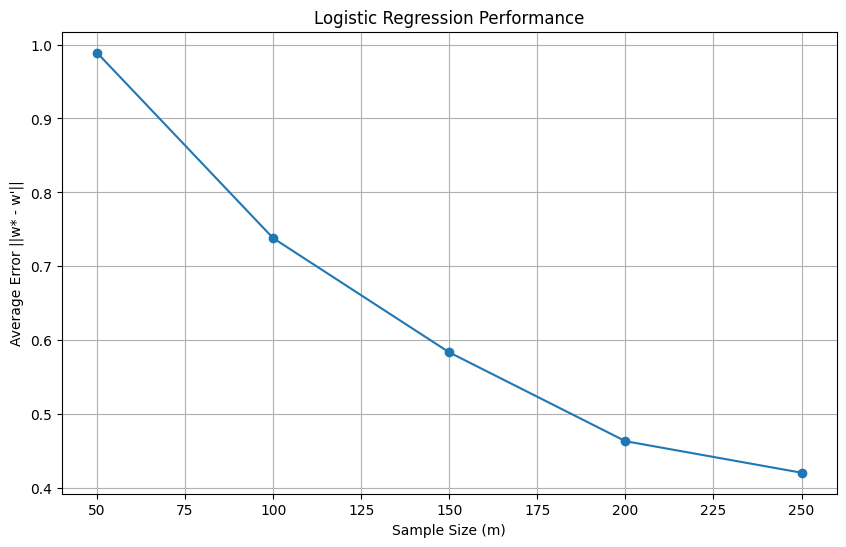

Total time for Logistic Regression: 0.03 seconds
Average errors for each sample size:
m = 50: 0.9889
m = 100: 0.7381
m = 150: 0.5836
m = 200: 0.4635
m = 250: 0.4209


In [24]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import time
import matplotlib.pyplot as plt

def logistic_regression_experiment(datasets):
    results = {m: [] for m in sample_sizes}
    total_time = 0

    for m in sample_sizes:
        for X, y, w_star in datasets[m]:
            start_time = time.time()
            
            # Train logistic regression model
            model = LogisticRegression(max_iter=1000)
            model.fit(X, y)
            
            # Get the learned weights
            w_prime = model.coef_[0]
            
            # Calculate the error
            error = np.linalg.norm(w_star - w_prime)
            results[m].append(error)
            
            total_time += time.time() - start_time

    # Calculate average errors
    avg_errors = [np.mean(results[m]) for m in sample_sizes]

    return avg_errors, total_time

# Run the experiment
lr_errors, lr_time = logistic_regression_experiment(datasets)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, lr_errors, marker='o')
plt.xlabel('Sample Size (m)')
plt.ylabel('Average Error ||w* - w\'||')
plt.title('Logistic Regression Performance')
plt.grid(True)
plt.show()

print(f"Total time for Logistic Regression: {lr_time:.2f} seconds")
print("Average errors for each sample size:")
for m, error in zip(sample_sizes, lr_errors):
    print(f"m = {m}: {error:.4f}")

## Algorithm 2: gradient descent with square loss

Define square loss as
$$L_i(w^{(t)}) = \frac{1}{2} \left( \sigma(w^{(t)} \cdot x) - y_i \right)^2$$

  Algorithm 2 is
  gradient descent with respect to square loss (code this
  up yourself -- run for 1000 iterations, use step size eta = 0.01).

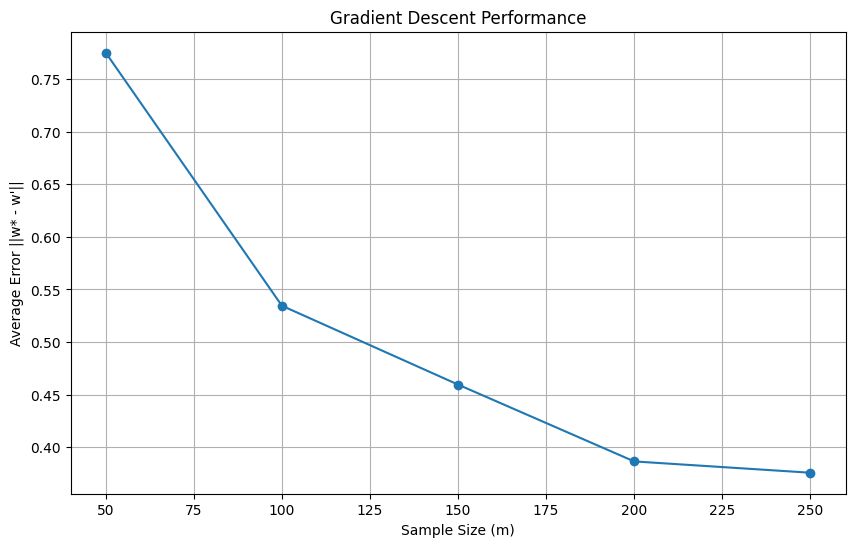

Total time for Gradient Descent: 0.31 seconds
Average errors for each sample size:
m = 50: 0.7751
m = 100: 0.5345
m = 150: 0.4595
m = 200: 0.3864
m = 250: 0.3756


In [25]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def gradient_descent(X, y, learning_rate=0.01, num_iterations=1000):
    m, n = X.shape
    w = np.zeros(n)
    
    for _ in range(num_iterations):
        # Compute predictions
        z = np.dot(X, w)
        predictions = sigmoid(z)
        
        # Compute gradient
        gradient = np.dot(X.T, (predictions - y)) / m
        
        # Update weights
        w -= learning_rate * gradient
    
    return w

def gradient_descent_experiment(datasets):
    results = {m: [] for m in sample_sizes}
    total_time = 0

    for m in sample_sizes:
        for X, y, w_star in datasets[m]:
            start_time = time.time()
            
            # Train using gradient descent
            w_prime = gradient_descent(X, y)
            
            # Calculate the error
            error = np.linalg.norm(w_star - w_prime)
            results[m].append(error)
            
            total_time += time.time() - start_time

    # Calculate average errors
    avg_errors = [np.mean(results[m]) for m in sample_sizes]

    return avg_errors, total_time

# Run the experiment
gd_errors, gd_time = gradient_descent_experiment(datasets)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, gd_errors, marker='o')
plt.xlabel('Sample Size (m)')
plt.ylabel('Average Error ||w* - w\'||')
plt.title('Gradient Descent Performance')
plt.grid(True)
plt.show()

print(f"Total time for Gradient Descent: {gd_time:.2f} seconds")
print("Average errors for each sample size:")
for m, error in zip(sample_sizes, gd_errors):
    print(f"m = {m}: {error:.4f}")

## Algorithm 3: stochastic gradient descent with square loss
Similar to gradient descent, except we use the gradient at a single random training point every iteration.

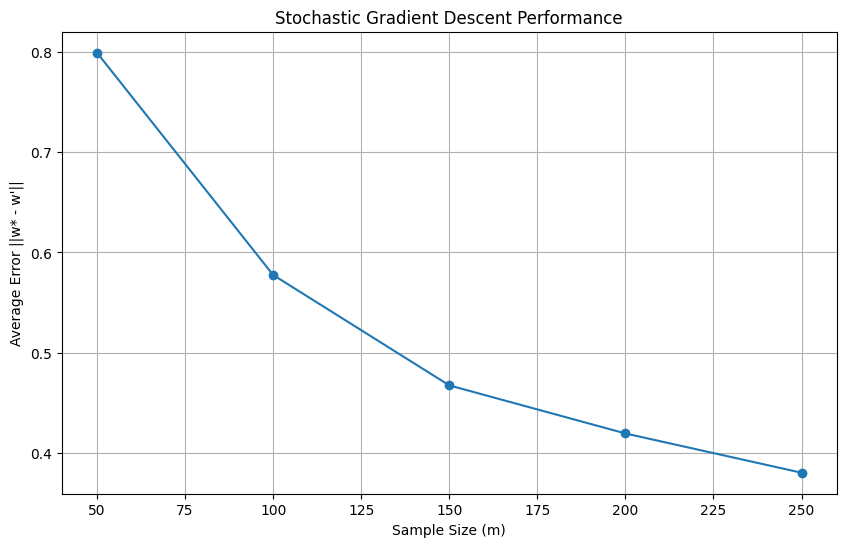

Total time for Stochastic Gradient Descent: 0.19 seconds
Average errors for each sample size:
m = 50: 0.7989
m = 100: 0.5776
m = 150: 0.4677
m = 200: 0.4198
m = 250: 0.3807


In [26]:
def stochastic_gradient_descent(X, y, learning_rate=0.01, num_iterations=1000):
    m, n = X.shape
    w = np.zeros(n)
    
    for _ in range(num_iterations):
        # Randomly select a data point
        i = np.random.randint(0, m)
        xi, yi = X[i], y[i]
        
        # Compute prediction for this point
        prediction = sigmoid(np.dot(xi, w))
        
        # Compute gradient for this point
        gradient = xi * (prediction - yi)
        
        # Update weights
        w -= learning_rate * gradient
    
    return w

def sgd_experiment(datasets):
    results = {m: [] for m in sample_sizes}
    total_time = 0

    for m in sample_sizes:
        for X, y, w_star in datasets[m]:
            start_time = time.time()
            
            # Train using stochastic gradient descent
            w_prime = stochastic_gradient_descent(X, y)
            
            # Calculate the error
            error = np.linalg.norm(w_star - w_prime)
            results[m].append(error)
            
            total_time += time.time() - start_time

    # Calculate average errors
    avg_errors = [np.mean(results[m]) for m in sample_sizes]

    return avg_errors, total_time

# Run the experiment
sgd_errors, sgd_time = sgd_experiment(datasets)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, sgd_errors, marker='o')
plt.xlabel('Sample Size (m)')
plt.ylabel('Average Error ||w* - w\'||')
plt.title('Stochastic Gradient Descent Performance')
plt.grid(True)
plt.show()

print(f"Total time for Stochastic Gradient Descent: {sgd_time:.2f} seconds")
print("Average errors for each sample size:")
for m, error in zip(sample_sizes, sgd_errors):
    print(f"m = {m}: {error:.4f}")

## Evaluation

Measure error $\|w - \hat{w}\|_2$ for each method at different sample size. For any
  fixed value of $m$, choose many different $w$'s and average the
  values $\|w - 
  \hat{w}\|_2$ for Algorithms 1, 2 and 3.  Plot the results
  for for each algorithm as you make $m$ large (use $m=50, 100, 150, 200, 250$).
  Also record, for each algorithm, the time taken to run the overall experiment.

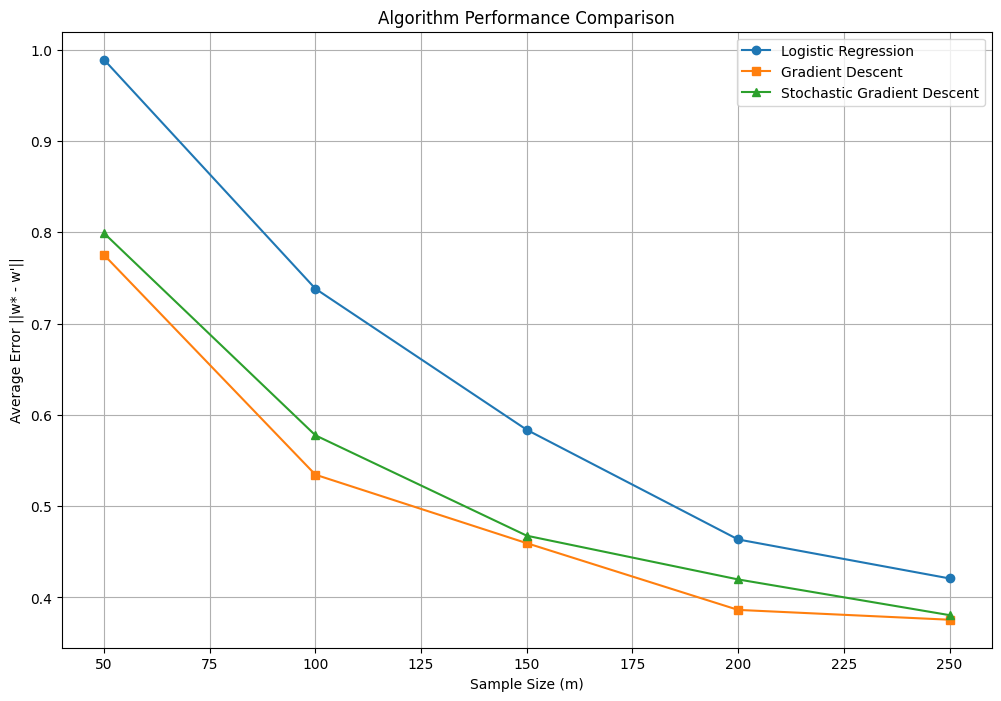

Execution times and final errors:
Logistic Regression:
  Total time: 0.03 seconds
  Final error (m=250): 0.4209

Gradient Descent:
  Total time: 0.31 seconds
  Final error (m=250): 0.3756

Stochastic Gradient Descent:
  Total time: 0.19 seconds
  Final error (m=250): 0.3807


In [27]:
import matplotlib.pyplot as plt

# Combine the results
plt.figure(figsize=(12, 8))

plt.plot(sample_sizes, lr_errors, marker='o', label='Logistic Regression')
plt.plot(sample_sizes, gd_errors, marker='s', label='Gradient Descent')
plt.plot(sample_sizes, sgd_errors, marker='^', label='Stochastic Gradient Descent')

plt.xlabel('Sample Size (m)')
plt.ylabel('Average Error ||w* - w\'||')
plt.title('Algorithm Performance Comparison')
plt.legend()
plt.grid(True)
plt.show()

# Print execution times and final errors
print("Execution times and final errors:")
print(f"Logistic Regression:")
print(f"  Total time: {lr_time:.2f} seconds")
print(f"  Final error (m={sample_sizes[-1]}): {lr_errors[-1]:.4f}")
print()
print(f"Gradient Descent:")
print(f"  Total time: {gd_time:.2f} seconds")
print(f"  Final error (m={sample_sizes[-1]}): {gd_errors[-1]:.4f}")
print()
print(f"Stochastic Gradient Descent:")
print(f"  Total time: {sgd_time:.2f} seconds")
print(f"  Final error (m={sample_sizes[-1]}): {sgd_errors[-1]:.4f}")

# Problem 2

For each depth in $1, \dots, 5$, instantiate an AdaBoost classifier with the base learner set to be a decision tree of that depth (set `n_estimators=10` and `learning_rate=1`), and then record the 10-fold cross-validated error on the entire breast cancer data set. Plot the resulting curve of accuracy against base classifier depth. Use $101$ as your random state for both the base learner as well as the AdaBoost classifier every time.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R

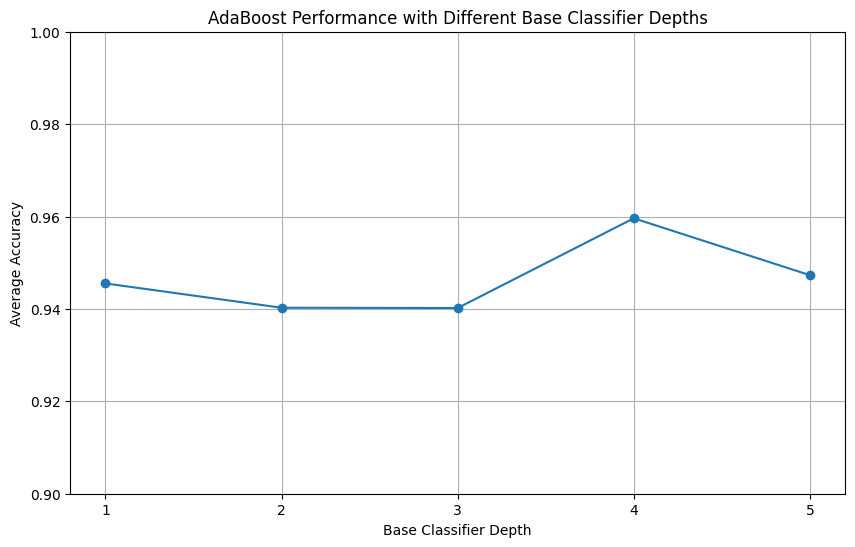

Depth 1: Accuracy = 0.9455
Depth 2: Accuracy = 0.9403
Depth 3: Accuracy = 0.9402
Depth 4: Accuracy = 0.9596
Depth 5: Accuracy = 0.9473


In [33]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

# Load the breast cancer dataset
cancer = datasets.load_breast_cancer()
X, y = cancer.data, cancer.target

# Define the depths for the base decision tree classifiers
depths = range(1, 6)

# List to store average accuracies for each depth
accuracies = []

for depth in depths:
    # Create base estimator (decision tree) with specified depth
    base_estimator = DecisionTreeClassifier(max_depth=depth, random_state=101)
    
    # Create AdaBoost classifier
    ada_classifier = AdaBoostClassifier(
        estimator=base_estimator,
        n_estimators=10,
        learning_rate=1,
        random_state=101
    )
    
    # Perform 10-fold cross-validation
    scores = cross_val_score(ada_classifier, X, y, cv=10)
    
    # Store the average accuracy
    accuracies.append(np.mean(scores))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(depths, accuracies, marker='o')
plt.xlabel('Base Classifier Depth')
plt.ylabel('Average Accuracy')
plt.title('AdaBoost Performance with Different Base Classifier Depths')
plt.xticks(depths)
plt.ylim(0.9, 1.0)  # Adjust this range based on your actual accuracy values
plt.grid(True)
plt.show()

# Print the accuracies
for depth, accuracy in zip(depths, accuracies):
    print(f"Depth {depth}: Accuracy = {accuracy:.4f}")